In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn import model_selection

In [3]:
data=sns.load_dataset('iris')

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
data['species'].map({'setosa':0,'versicolor':1,'virginica':2})

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [7]:
with_two_f=data[data['species']!='setosa']

In [8]:
with_two_f.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [9]:
with_two_f['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [10]:
# Independent and dependent features
X=with_two_f.iloc[:,:-1]
Y=with_two_f.iloc[:,-1]

In [11]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
Y

50     versicolor
51     versicolor
52     versicolor
53     versicolor
54     versicolor
          ...    
145     virginica
146     virginica
147     virginica
148     virginica
149     virginica
Name: species, Length: 100, dtype: object

In [13]:
from sklearn.linear_model import LogisticRegression 

In [14]:
regression=LogisticRegression()

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.20, random_state=42)

In [16]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
105,7.6,3.0,6.6,2.1
138,6.0,3.0,4.8,1.8
76,6.8,2.8,4.8,1.4
92,5.8,2.6,4.0,1.2
119,6.0,2.2,5.0,1.5
...,...,...,...,...
110,6.5,3.2,5.1,2.0
121,5.6,2.8,4.9,2.0
64,5.6,2.9,3.6,1.3
142,5.8,2.7,5.1,1.9


In [17]:
from sklearn.model_selection import GridSearchCV
parameter={'C':[0.5,1,2,3,4,5,6,45,24,25],'penalty':['l1','l2','elasticnet']}
log_regressor=GridSearchCV(regression,parameter,scoring='accuracy',cv=5)
log_regressor.fit(X,Y)


E:\chaha\juypter notebook\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "E:\chaha\juypter notebook\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\chaha\juypter notebook\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "E:\chaha\juypter notebook\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 4, 5, 6, 45, 24, 25],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [18]:
predict=log_regressor.predict(X_test)

In [19]:
log_regressor.best_params_

{'C': 45, 'penalty': 'l2'}

In [20]:
log_regressor.best_score_

0.97

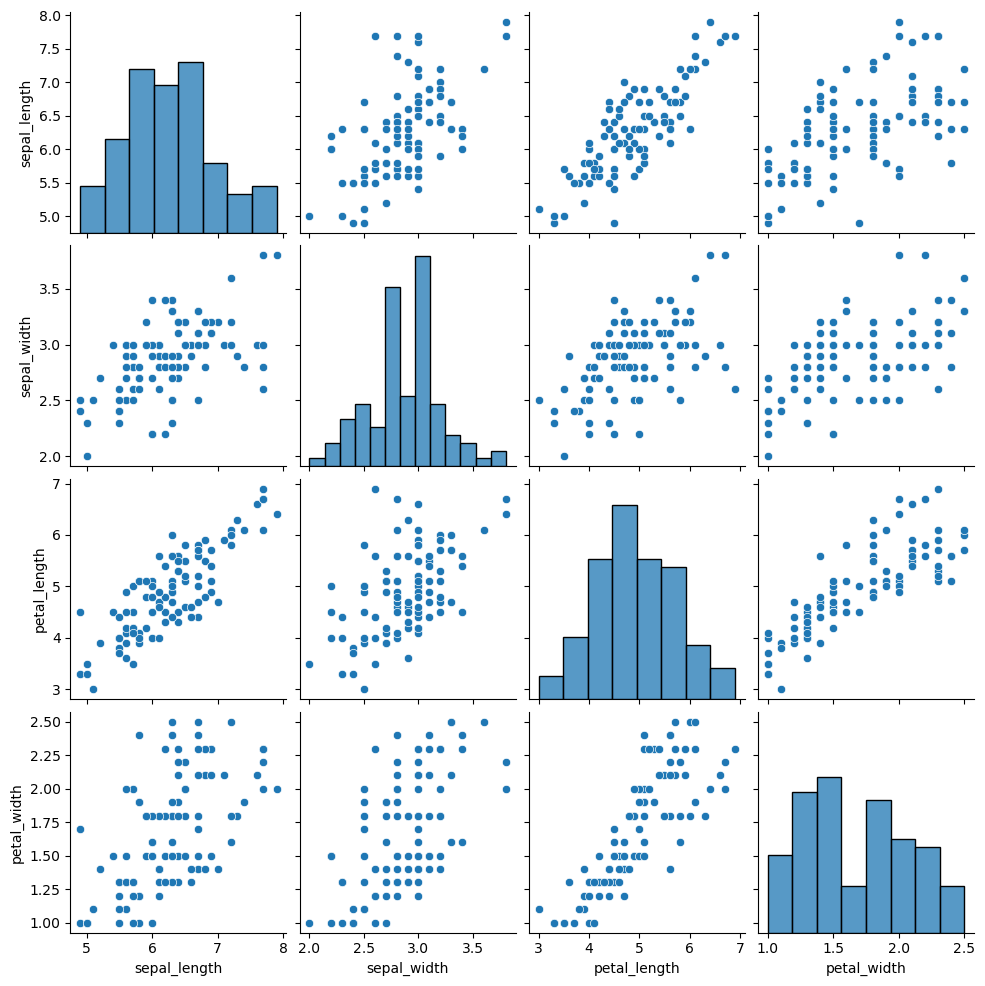

In [21]:
sns.pairplot(with_two_f)

In [22]:
sns.pairplot(with_two_f,hue='species')

In [23]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_recall_curve,roc_auc_score

In [24]:
confusion_matrix(Y_test,predict)

array([[11,  1],
       [ 1,  7]], dtype=int64)

In [25]:
accuracy_score(Y_test,predict)   ######################90%###########################

0.9